<a href="https://colab.research.google.com/github/nightblade-123/Chance-of-Admission-for-Higher-Studies/blob/main/Chance_of_Admission_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!wget https://raw.githubusercontent.com/Mohansacharya/Graduate-Admissions/master/Admission_Predict.csv


--2025-12-30 12:53:38--  https://raw.githubusercontent.com/Mohansacharya/Graduate-Admissions/master/Admission_Predict.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2025-12-30 12:53:38 ERROR 404: Not Found.



In [4]:
import os
os.listdir()


['.config', 'Admission_Predict.csv', 'sample_data']

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [6]:
df = pd.read_csv("Admission_Predict.csv")
df.head()


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [7]:
df.drop(columns=["Serial No."], inplace=True)
df.isnull().sum()


,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


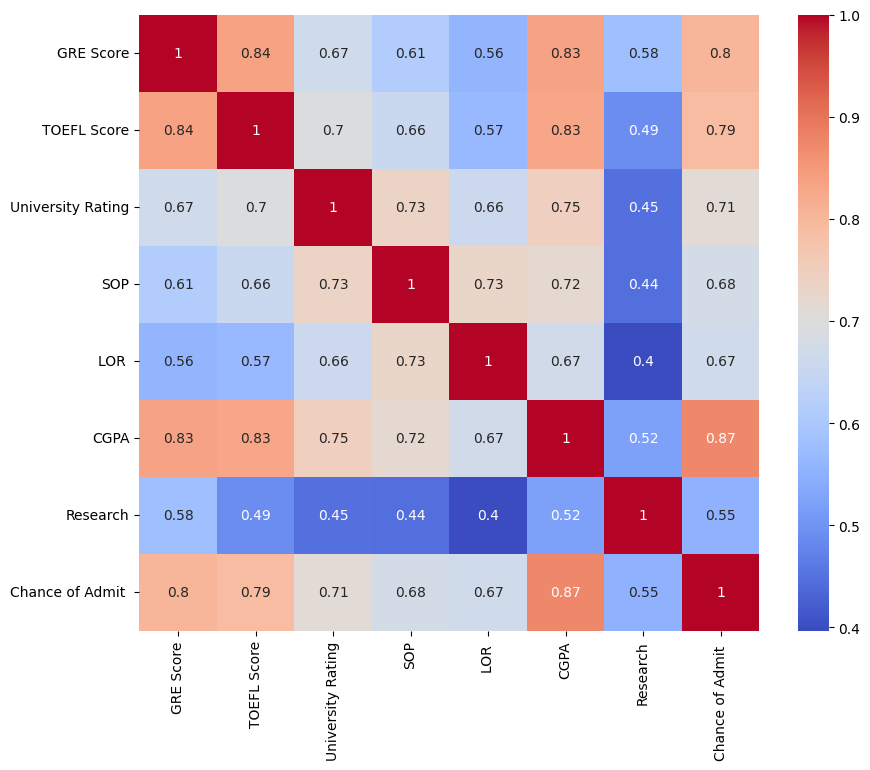

In [8]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()


In [9]:
X = df.drop("Chance of Admit ", axis=1)
y = df["Chance of Admit "]


In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [11]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [12]:
y_pred = model.predict(X_test)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


Mean Squared Error: 0.004617003377285005
R2 Score: 0.8212082591486993


In [13]:
sample_input = [[320, 110, 4, 4.5, 4.5, 9.2, 1]]
prediction = model.predict(sample_input)

print("Chance of Admission:", round(prediction[0]*100, 2), "%")


Chance of Admission: 84.17 %


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [14]:
import pickle

with open("admission_model.pkl", "wb") as f:
    pickle.dump(model, f)


In [15]:
from google.colab import files
files.download("admission_model.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>